In [10]:
import os
os.add_dll_directory(
    "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\bin")

AttributeError: module 'os' has no attribute 'add_dll_directory'

In [1]:
import pickle
import keras
import numpy as np
from keras import layers, Model, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model



In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


## Loading generated dataset

In [3]:
paddle_latents, paddle_coords = pickle.load(open('./paddle_latent_ds.p', 'rb'))

paddle_latent_train, paddle_latent_test, paddle_coords_train, paddle_coords_test = train_test_split(
    paddle_latents.numpy(), 
    paddle_coords.numpy(), 
    test_size=0.2
)

## Model for Paddles latent

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense (Dense)                (None, 100)               1700      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 2,568
Trainable params: 2,336
Non-trainable params: 232
_________________________________________________________

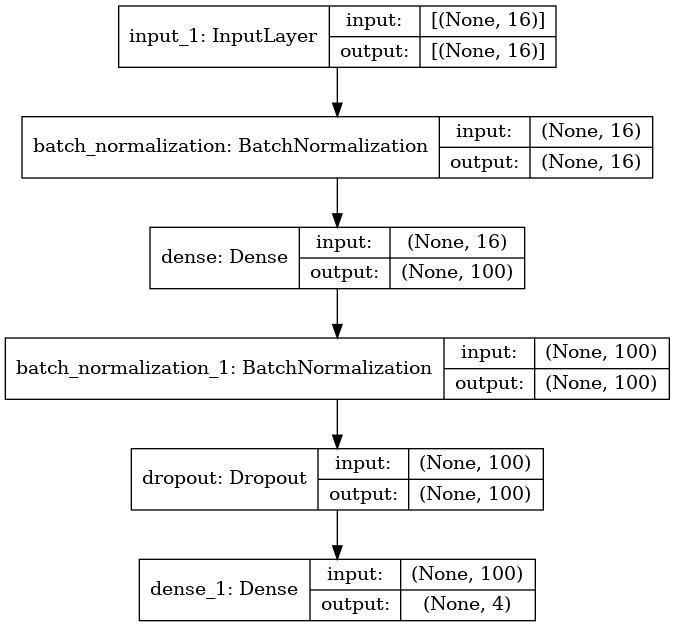

In [4]:
ip = Input((paddle_latents.shape[1]))

x = layers.BatchNormalization()(ip)
x = layers.Dense(100, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.15)(x)
out = layers.Dense(paddle_coords.shape[1], activation='relu')(x)

paddle_model = Model(ip, out)
paddle_model.compile(optimizer='adam', loss=keras.losses.mean_absolute_error)
paddle_model.summary()

plot_model(paddle_model, "paddle_latent.png", show_shapes=True)

In [5]:
history = paddle_model.fit(
    x=paddle_latent_train,
    y=paddle_coords_train,
    batch_size=128,
    epochs=100,
    validation_data=(paddle_latent_test, paddle_coords_test)
)

Epoch 1/100
157/157 [==============================] - 1s 3ms/step - loss: 4.9895 - val_loss: 4.1739
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 2.3561 - val_loss: 3.2170
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 1.6820 - val_loss: 3.1409
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 1.4202 - val_loss: 3.0905
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 1.2565 - val_loss: 3.1005
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 1.1519 - val_loss: 3.1184
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0922 - val_loss: 3.1145
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0879 - val_loss: 3.0765
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0124 - val_loss: 3.0635
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0035 - val_lo

In [1]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,6), dpi=80)
plt.plot(range(len(loss)), loss, 'b', label='Loss')
plt.plot(range(len(val_loss)), val_loss, 'r', label='Val Loss')
plt.title('Paddles location prediction')
plt.legend()
#plt.gca().set_ylim([0,70])
plt.xlabel('Epochs')
plt.ylabel('MAE')

NameError: name 'history' is not defined